In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
from scipy.stats import shapiro



In [ ]:
data=pd.read_csv("/content/marketing_AB.csv")
data.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [ ]:
data.shape

(588101, 7)

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
user id,0
test group,0
converted,0
total ads,0
most ads day,0
most ads hour,0


In [ ]:
data.isna().sum()

,0
Unnamed: 0,0
user id,0
test group,0
converted,0
total ads,0
most ads day,0
most ads hour,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.drop(['Unnamed: 0', 'user id'], axis=1, inplace=True)

# **EDA & Data Visualization**

In [ ]:
data.describe(include='all')

,test group,converted,total ads,most ads day,most ads hour
count,588101,588101,588101.000000,588101,588101.000000
unique,2,2,NaN,7,NaN
top,ad,False,NaN,Friday,NaN
freq,564577,573258,NaN,92608,NaN
mean,NaN,NaN,24.820876,NaN,14.469061
std,NaN,NaN,43.715181,NaN,4.834634
min,NaN,NaN,1.000000,NaN,0.000000
25%,NaN,NaN,4.000000,NaN,11.000000
50%,NaN,NaN,13.000000,NaN,14.000000
75%,NaN,NaN,27.000000,NaN,18.000000


In [ ]:
data_psa = data[data['test group']=='psa']
data_ad = data[data['test group']=='ad']
print(f'====================== OBSERVATIONS ======================')
print(f"The number of instances that have seen advertisement (ad group): {data_ad.shape[0]}")
print(f"The number of instances that have not seen advertisement(psa group): {data_psa.shape[0]}\n")

print(f'========================== MEAN ==========================')

print(f"The mean of converted instances in the ad group: {data_ad['converted'].mean()*100:.2f}%")
print(f"The mean of converted instances in the psa group: {data_psa['converted'].mean()*100:.2f}%")

====================== OBSERVATIONS ======================
The number of instances that have seen advertisement (ad group): 564577
The number of instances that have not seen advertisement(psa group): 23524

========================== MEAN ==========================
The mean of converted instances in the ad group: 2.55%
The mean of converted instances in the psa group: 1.79%


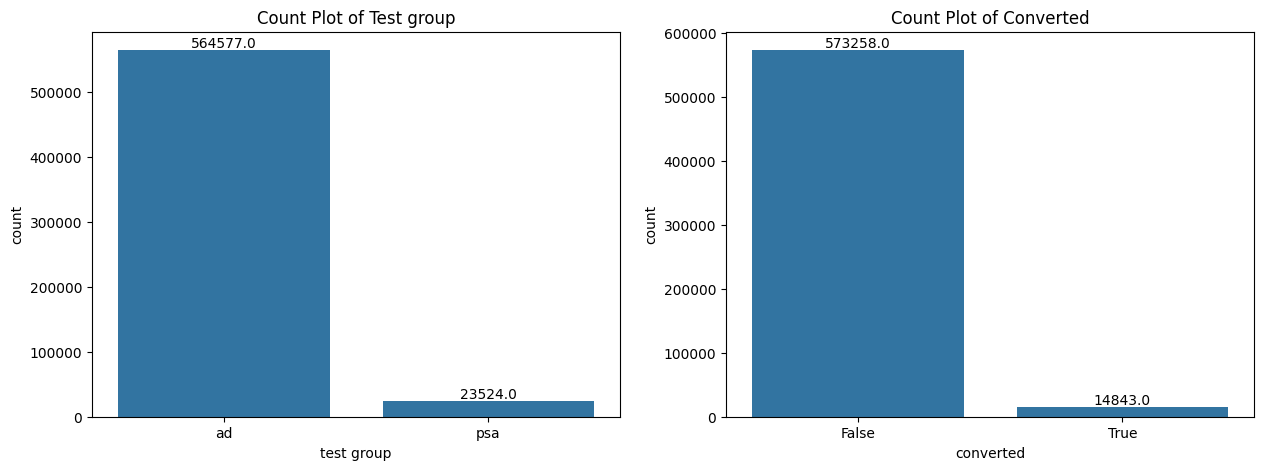

In [ ]:
columns_to_plot = ['test group', 'converted']

fig, ax = plt.subplots(1, len(columns_to_plot), figsize=(15, 5), dpi=100)

for i, col in enumerate(columns_to_plot):
    # Count plot for the current column with count labels
    sns.countplot(data=data, x=col, ax=ax[i])
    ax[i].set_title(f'Count Plot of {col.capitalize()}')
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

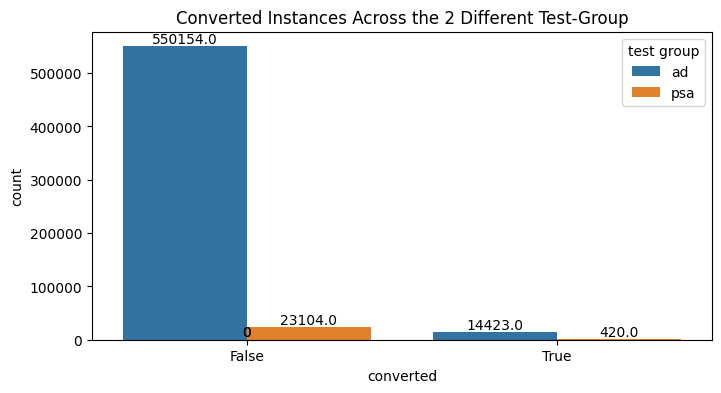

In [ ]:
plt.figure(figsize=(8, 4), dpi=100)
sns.countplot(data=data, x='converted', hue='test group')
plt.title('Converted Instances Across the 2 Different Test-Group')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

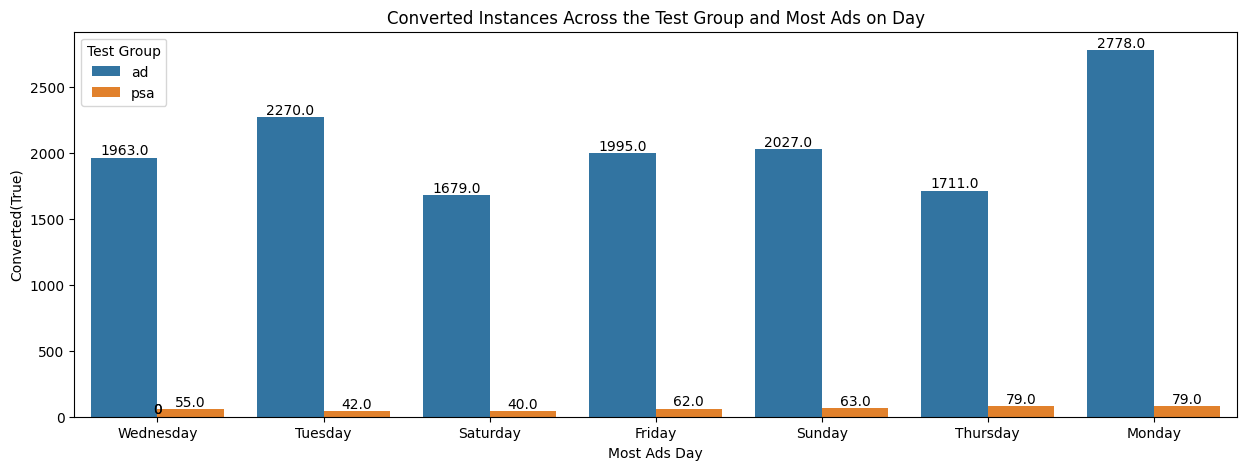

In [ ]:
# Create a count plot for 'test group', 'most ads day', and 'converted' values
plt.figure(figsize=(15, 5), dpi=100)
sns.countplot(data=data[data['converted'] == True], x='most ads day', hue='test group')

plt.title('Converted Instances Across the Test Group and Most Ads on Day')
plt.xlabel('Most Ads Day')
plt.ylabel('Converted(True)')
plt.legend(title='Test Group', loc='upper left')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

**Discussion**:  \
Monday occurs a most purchase compare with others day, with a highest number of ad, 2778.

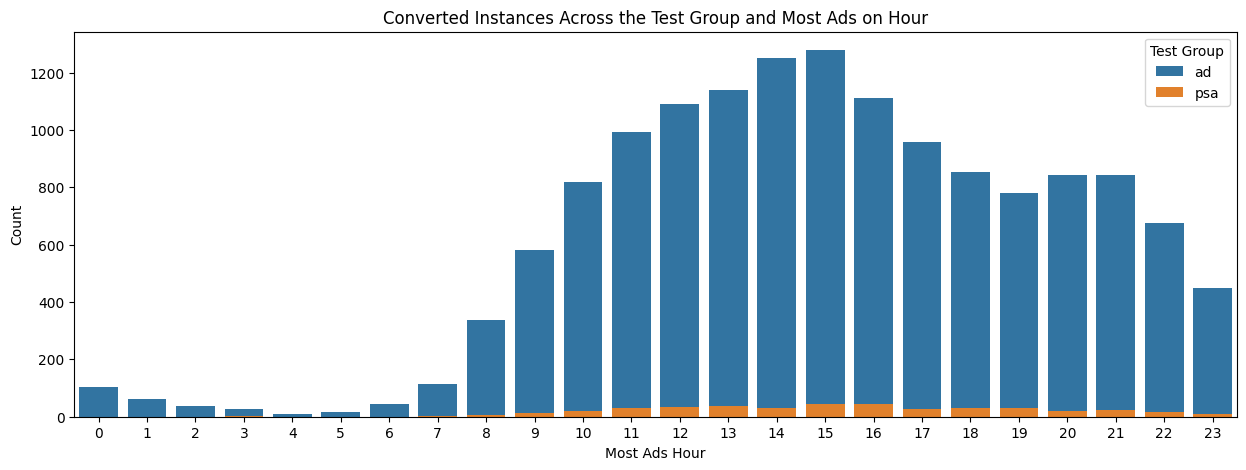

In [ ]:
plt.figure(figsize=(15, 5), dpi=100)
sns.countplot(x='most ads hour', hue='test group', data=data[data['converted'] == True], dodge=False)
plt.title('Converted Instances Across the Test Group and Most Ads on Hour')
plt.xlabel('Most Ads Hour')
plt.ylabel('Count')
plt.legend(title='Test Group')
plt.show()

**Discussion**: \
The marketing between 2 p.m. and 3 p.m. is the most effective for conveying the message to the audience.


## **Hypothesis**

**Null Hypothesis** (**HO**): There is no significant difference in purchasing behaviour between ad and psa group. \

**Alternative Hypothesis** (**H1**): There is a significant difference in purchasing behaviour between ad and psa group.

## **Chi 2 Test**

Used to determined the significant difference in buying behavior between the ad and psa groups.

We are going to use 2 apporach in Chi 2 test:

1. From scratch
2. Using stats.chi2_contingency

In [ ]:
chi2 = pd.crosstab(data['converted'], data['test group'], margins=True)
chi2

test group,ad,psa,All
converted,,,
False,550154,23104,573258
True,14423,420,14843
All,564577,23524,588101


In [ ]:
# Observation values
obs = np.concatenate([chi2.iloc[0, :-1].values, chi2.iloc[1, :-1].values])

# Row sums
row_sums = chi2.iloc[0:2, 2].values

# Total sum of all values in the table
total_sum = chi2.loc['All', 'All']

# Expected values calculation
expected = [
    val * row_sum / total_sum
    for row_sum in row_sums
    for val in chi2.iloc[2, :-1].values
]

# Degrees of freedom
dof = (len(row_sums) - 1) * (len(chi2.iloc[2, :-1].values) - 1)

# Chi-squared test statistic
chi2_stat = np.sum((obs - expected) ** 2 / expected)

# P-value calculation
p_value = 1 - stats.chi2.cdf(chi2_stat, dof)

# Output results
print(f'The result of Chi2Test:\ndof = {dof}\nP-value = {p_value}')

The result of Chi2Test:
dof = 1
P-value = 1.7053025658242404e-13


In [ ]:
obs = np.array([chi2.iloc[0][: -1].values, chi2.iloc[1][: -1].values])
statistic, pvalue, dof, expected_freq = stats.chi2_contingency(obs)
print(f'The result of Chi2Test:\nChi-square statistic = {statistic:.2f}\nDegree of Freedom = {dof}\nP-value = {pvalue:.2f}')

The result of Chi2Test:
Chi-square statistic = 54.01
Degree of Freedom = 1
P-value = 0.00


**Discussion**: \
Since our p-value is less than 0.05, we have enough evidence to reject the null hypothesis (Ho). This suggests that there is a significant relationship between the variables, supporting the alternative hypothesis (H1).

## **AB Test**

Binomial Distribution

In [ ]:
ad_converted = np.random.choice([1, 0], size=len(data_ad), p=[data.converted.mean(), (1 - data.converted.mean())])
psa_converted = np.random.choice([1, 0], size=len(data_psa), p=[data.converted.mean(), (1 - data.converted.mean())])

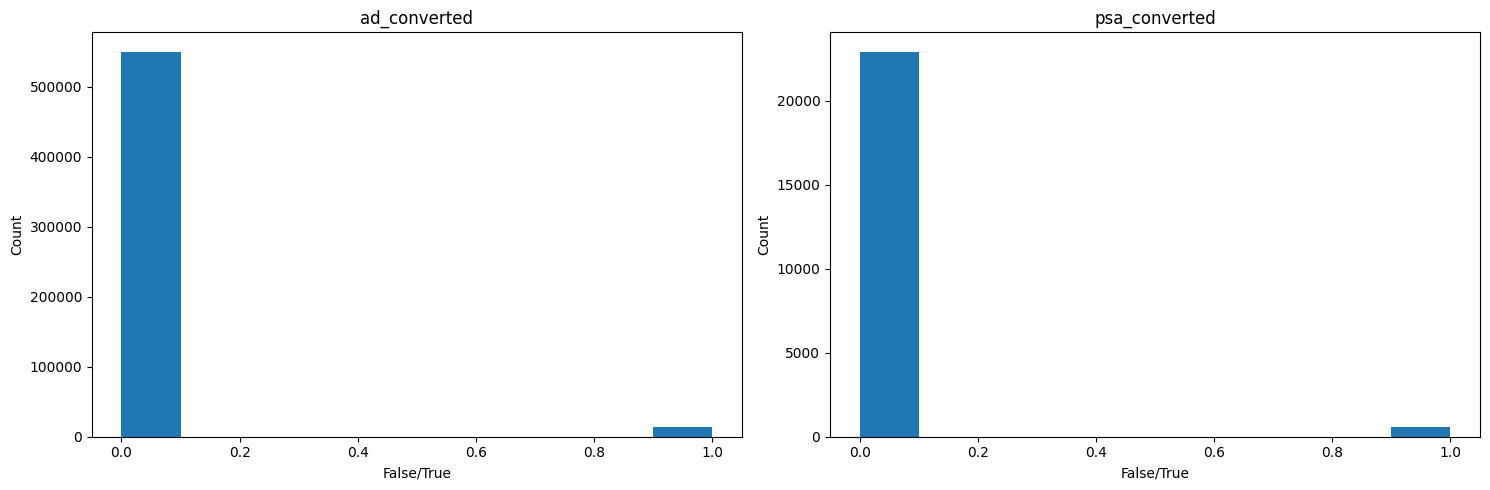

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5), dpi=100)
ax1.hist(ad_converted);
ax2.hist(psa_converted);
ax1.set(title='ad_converted', xlabel='False/True', ylabel='Count');
ax2.set(title='psa_converted', xlabel='False/True', ylabel='Count');
plt.tight_layout()

In [ ]:
# Generate random samples for ad and psa groups
ad_converted = np.random.binomial(len(data_ad), data.converted.mean(), 10000) / len(data_ad)
psa_converted = np.random.binomial(len(data_psa), data.converted.mean(), 10000) / len(data_psa)

# Calculate differences
p_diffs = ad_converted - psa_converted
ab_data_diff = data_ad['converted'].mean() - data_psa['converted'].mean()

# Print results
print("Results of AB Test Simulation:")
print("----------------------------------------------------")
print(f"Mean difference of randomly generated instances: {p_diffs.mean():.5f}")
print(f"Actual difference between ad and psa groups: {ab_data_diff:.5f}")
p_value = (p_diffs > ab_data_diff).mean()
print(f"P-value: {p_value * 100:.2f}%")
print("----------------------------------------------------")
if p_value < 0.05:
    print("There is a significant difference in conversion rates between ad and psa groups.")
else:
    print("There is no significant difference in conversion rates between ad and psa groups.")

Results of AB Test Simulation:
----------------------------------------------------
Mean difference of randomly generated instances: 0.00001
Actual difference between ad and psa groups: 0.00769
P-value: 0.00%
----------------------------------------------------
There is a significant difference in conversion rates between ad and psa groups.


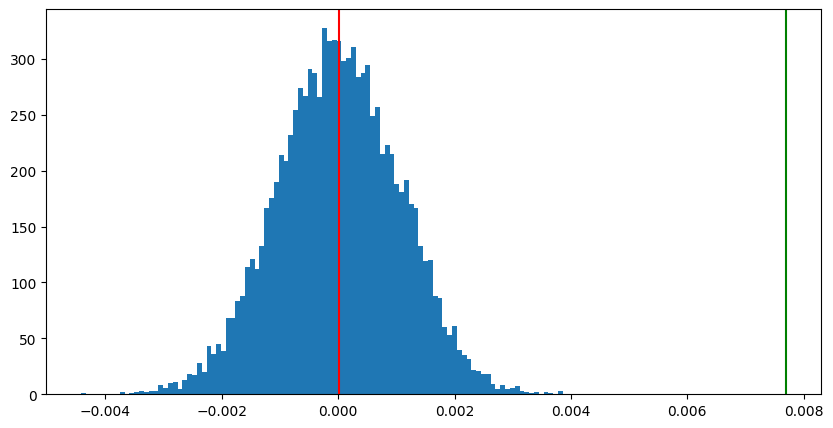

In [ ]:
plt.figure(figsize=(10, 5), dpi=100)
plt.hist(p_diffs, bins=100)
low = ab_data_diff
higth = p_diffs.mean()
plt.axvline(x=low, color='g')
plt.axvline(x=higth, color='r')

## **AB Test (from scratch)**

In [ ]:
psa = np.array(data[data['test group']=='psa']['converted'])
ad = np.array(data[data['test group']=='ad']['converted'])

converted = np.array([
    np.append(np.zeros(len(psa)), np.ones(len(ad))),
    np.append(psa, ad)
])
converted_t = converted.T

In [ ]:
def ABTest(N):
    experiment_diff_mean = np.empty([N, 1])
    for times in np.arange(N):
        experiment_label = np.random.randint(0, 2, len(converted_t))
        experiment_data = np.array([
            experiment_label,
            converted_t[:, 1]
        ]).T
        experiment_diff_mean[times] = experiment_data[experiment_data[:, 0] == 1][:, 1].mean() - experiment_data[experiment_data[:, 0] == 0][:, 1].mean()
    return experiment_diff_mean

In [ ]:
AB_test = ABTest(1000)
p_value = len(AB_test[AB_test >= ab_data_diff])/ 1000 * 100
print(f"The p-value in ABTest is: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in conversion rates between ad and psa groups.")
else:
    print("There is no significant difference in conversion rates between ad and psa groups.")

The p-value in ABTest is: 0.0
There is a significant difference in conversion rates between ad and psa groups.


## **T Test**
The T-Test calculates a test statistic (t-value) based on the means and standard deviations of the two groups, along with the sample sizes. This t-value is then compared to a critical value from the t-distribution to determine statistical significance.

One of the key assumptions of the T-Test is that the data within each group follows a normal distribution.

Since test group and converted columns are categorical (non-continuous), we cannot check for normality directly. Instead, we should check whether the assumptions of the T-test hold for the data. This includes: 1. Both groups are independent. 2. The samples are approximately normally distributed. 3. Homogeneity of variances.

So, the T-test is not suitable for this dataset since it requires continuous data. To check the normality of the data, we can use the Shapiro-Wilk test for each group separately.

In [ ]:
ad_group = data[data['test group'] == 'ad']['converted']
psa_group = data[data['test group'] == 'psa']['converted']

stat_ad, p_ad = shapiro(ad_group)
stat_psa, p_psa = shapiro(psa_group)

print("Shapiro-Wilk Test - Ad Group: Statistic=%.3f, p-value=%.3f" % (stat_ad, p_ad))
print("Shapiro-Wilk Test - PSA Group: Statistic=%.3f, p-value=%.3f" % (stat_psa, p_psa))

Shapiro-Wilk Test - Ad Group: Statistic=0.142, p-value=0.000
Shapiro-Wilk Test - PSA Group: Statistic=0.110, p-value=0.000


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 564577.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 23524.
  res = hypotest_fun_out(*samples, **kwds)


When the p-value of the Shapiro-Wilk test is less than 0.05 (significant level), it indicates that the data does not follow a normal distribution. So, for this dataset, we can't use T-Test.

## **G Test**
It calculates the likelihood ratio between the observed data and the expected data

In [ ]:
# G-Test
contingency_table = pd.crosstab(data['test group'], data['converted'])
g_stat, p_val, _, _ = stats.chi2_contingency(contingency_table, lambda_="log-likelihood")
print("G-test statistic:", g_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject Null Hypothesis: There is a significant difference in conversion rates between the ad and psa groups using G-test.")
else:
    print("Fail to reject Null Hypothesis: There is no significant difference in conversion rates between the ad and psa groups using G-test.")

G-test statistic: 59.782230158204584
P-value: 1.059557167561035e-14
Reject Null Hypothesis: There is a significant difference in conversion rates between the ad and psa groups using G-test.
